In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns#for advanced level visualization
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error #evaluation
from sklearn.preprocessing import LabelEncoder,OneHotEncoder #categorial
from sklearn.preprocessing import StandardScaler,minmax_scale #numerical

In [10]:
dataset = pd.read_csv("../datasets/50_Startups.csv")

In [4]:
# EDA

In [5]:
dataset.shape  # 50 oberservation,5 variables

(50, 5)

In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
len(dataset)

50

In [8]:
dataset.info()  # meta information ,descriptive statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [15]:
features=list(dataset.columns[:-1])

In [16]:
features

['R&D Spend', 'Administration', 'Marketing Spend', 'State']

In [20]:
target=dataset.columns[-1]

In [21]:
target

'Profit'

In [22]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
dataset.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
17,94657.16,145077.58,282574.31,New York,125370.37
32,63408.86,129219.61,46085.25,California,97427.84
6,134615.46,147198.87,127716.82,California,156122.51
30,61994.48,115641.28,91131.24,Florida,99937.59
34,46426.07,157693.92,210797.67,California,96712.80


In [31]:
dataset[["Administration","Marketing Spend"]][41:46]

,Administration,Marketing Spend
41,84710.77,164470.71
42,96189.63,148001.11
43,127382.30,35534.17
44,154806.14,28334.72
45,124153.04,1903.93


In [40]:
dataset.iloc[41:46,1:3]

,Administration,Marketing Spend
41,84710.77,164470.71
42,96189.63,148001.11
43,127382.30,35534.17
44,154806.14,28334.72
45,124153.04,1903.93


In [41]:
dataset.iloc[41:46, [0,3]]#specific column index passed

,R&D Spend,State
41,27892.92,Florida
42,23640.93,California
43,15505.73,New York
44,22177.74,California
45,1000.23,New York


In [43]:
dataset.loc[41:46, ["R&D Spend", "State"]]#use loc with name of columns

,R&D Spend,State
41,27892.92,Florida
42,23640.93,California
43,15505.73,New York
44,22177.74,California
45,1000.23,New York
46,1315.46,Florida


In [44]:
dataset["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [51]:
dataset.groupby(by="State").sum()#work on basis of categoral value and consider state as index

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,1099180.46,2052690.62,3103195.80,1766387.98
Florida,1291584.26,1948302.36,3957176.82,1900384.39
New York,1295316.06,2066239.00,3490882.27,1933859.59


In [52]:
dataset.groupby(by="State").count()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,17,17,17,17
Florida,16,16,16,16
New York,17,17,17,17


In [53]:
dataset.groupby(by="State",as_index=False).sum()

,State,R&D Spend,Administration,Marketing Spend,Profit
0,California,1099180.46,2052690.62,3103195.80,1766387.98
1,Florida,1291584.26,1948302.36,3957176.82,1900384.39
2,New York,1295316.06,2066239.00,3490882.27,1933859.59


In [55]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [56]:
dataset.dropna()#drop row if encounter with missing value

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [59]:
#graphical represenation

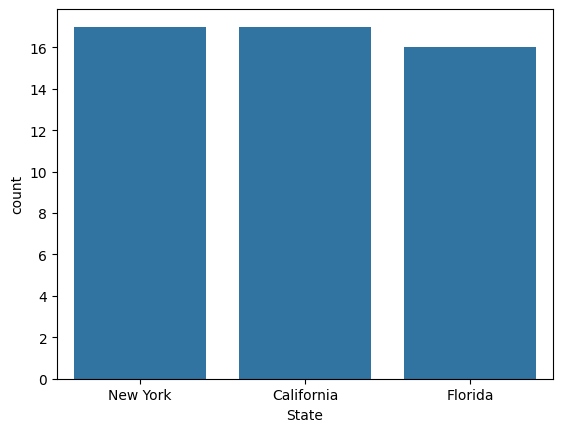

In [61]:
sns.countplot(data=dataset,x="State")#categorical values
plt.show()

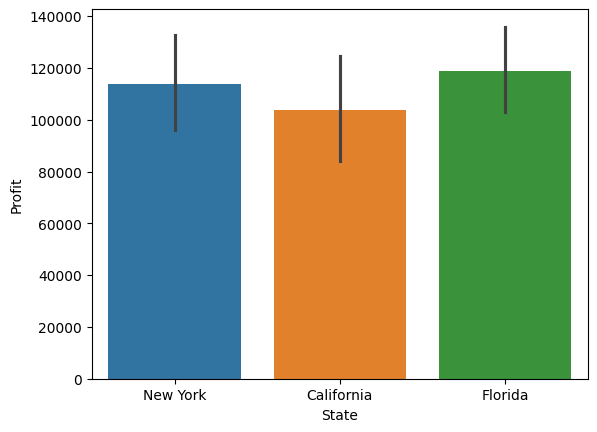

In [63]:
sns.barplot(data=dataset,y="Profit",x="State",hue="State")
plt.show()

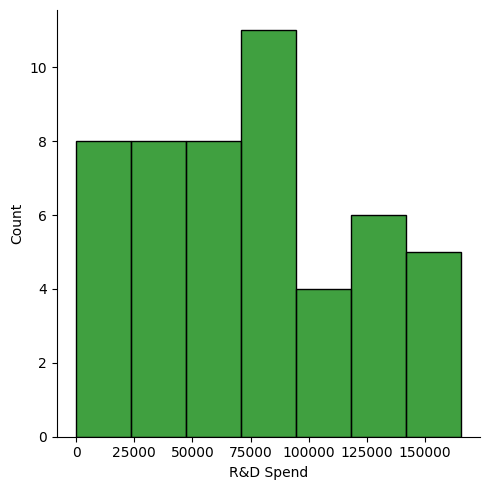

In [66]:
sns.displot(data=dataset, x="R&D Spend",color='green')

In [67]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


###data transformation machine learning
#### 1.categorical data transformation
1. labl encoding(0,1,2)#classification,target=categorical
2. one hot encoding()#features encoding
<!-- 3. sklearn label encoding -->
<!-- we will apply through sklearn using built in class oneHotlclass -->

   

In [74]:
state=pd.get_dummies(dataset['State'],dtype=int,drop_first=True)#one hot label

In [75]:
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [76]:
#concate with dataset

In [77]:
dataset=pd.concat([state,dataset],axis=1)

In [78]:
dataset

,Florida,New York,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,1,165349.20,136897.80,471784.10,New York,192261.83
1,0,0,162597.70,151377.59,443898.53,California,191792.06
2,1,0,153441.51,101145.55,407934.54,Florida,191050.39
3,0,1,144372.41,118671.85,383199.62,New York,182901.99
4,1,0,142107.34,91391.77,366168.42,Florida,166187.94
5,0,1,131876.90,99814.71,362861.36,New York,156991.12
6,0,0,134615.46,147198.87,127716.82,California,156122.51
7,1,0,130298.13,145530.06,323876.68,Florida,155752.60
8,0,1,120542.52,148718.95,311613.29,New York,152211.77
9,0,0,123334.88,108679.17,304981.62,California,149759.96


In [80]:
dataset.drop(["State"],axis=1,inplace=True)

In [81]:
dataset

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94
5,0,1,131876.90,99814.71,362861.36,156991.12
6,0,0,134615.46,147198.87,127716.82,156122.51
7,1,0,130298.13,145530.06,323876.68,155752.60
8,0,1,120542.52,148718.95,311613.29,152211.77
9,0,0,123334.88,108679.17,304981.62,149759.96


In [82]:
X=dataset.iloc[:,:-1].values#features skip last row profit

In [83]:
y=dataset.iloc[:,-1].values#target

In [97]:
#data spliting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=None)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(40, 5)
(10, 5)
(40,)
(10,)


In [99]:
#model train
model=LinearRegression()#model load
model.fit(X_train,y_train)#model training
y_pred=model.predict(X_test)#model predit

In [100]:
# model.score(X,y)

In [102]:
r2_score(y_test,y_pred)#model evaluation

0.9700327644707497